In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import math

#Data Exploration

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv", delimiter=';')

In [ ]:
df_original = df.copy()

In [ ]:
df["Datum"] = pd.to_datetime(df["Datum"])

In [ ]:
for col in df.iloc[:,1:].columns:
    if df[col].dtype == 'object':
      df[col] = df[col].str.replace(',', '.').astype(float)

In [ ]:
df.head()

,Datum,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-07 00:15:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Columns: 165 entries, Datum to 164
dtypes: float64(161), object(4)
memory usage: 3.7+ MB


In [ ]:
df.shape

(2976, 165)

In [ ]:
# columns_to_check = ["86", "45", "4", "127", "45"]

# for col in columns_to_check:
#     print(f"Value counts for column {col}:")
#     print(df[col].value_counts())
#     print(df[col].unique())
#     print("-" * 50)

In [ ]:
# # Find columns that contain negative values
# list_of_neg_col = []
# df_copy = df.copy()
# for col in df.iloc[:,1:].columns:
#     if df_copy[col].dtype == 'object':
#       df_copy[col] = df_copy[col].str.replace(',', '.').astype(float)
#     if (df_copy[col] < 0.0).any():
#       list_of_neg_col.append(col)

In [ ]:
# list_of_neg_col

In [ ]:
df_nulls = df.isnull().sum()

In [ ]:
df_nulls.info()

<class 'pandas.core.series.Series'>
Index: 165 entries, Datum to 164
Series name: None
Non-Null Count  Dtype
--------------  -----
165 non-null    int64
dtypes: int64(1)
memory usage: 2.6+ KB


In [ ]:
for col in df.columns:
  if not df[col].isnull().values.any():
    print(col)

Datum


**So, The only column in the dataframe which is not null is 'Datum'.**

In [ ]:
df_nulls = df_nulls[1:]

In [ ]:
df_nulls.describe()

count    164.000000
mean      89.274390
std        9.337126
min       65.000000
25%       83.000000
50%       88.500000
75%       95.000000
max      116.000000
dtype: float64

In [ ]:
df_nulls.median()

88.5

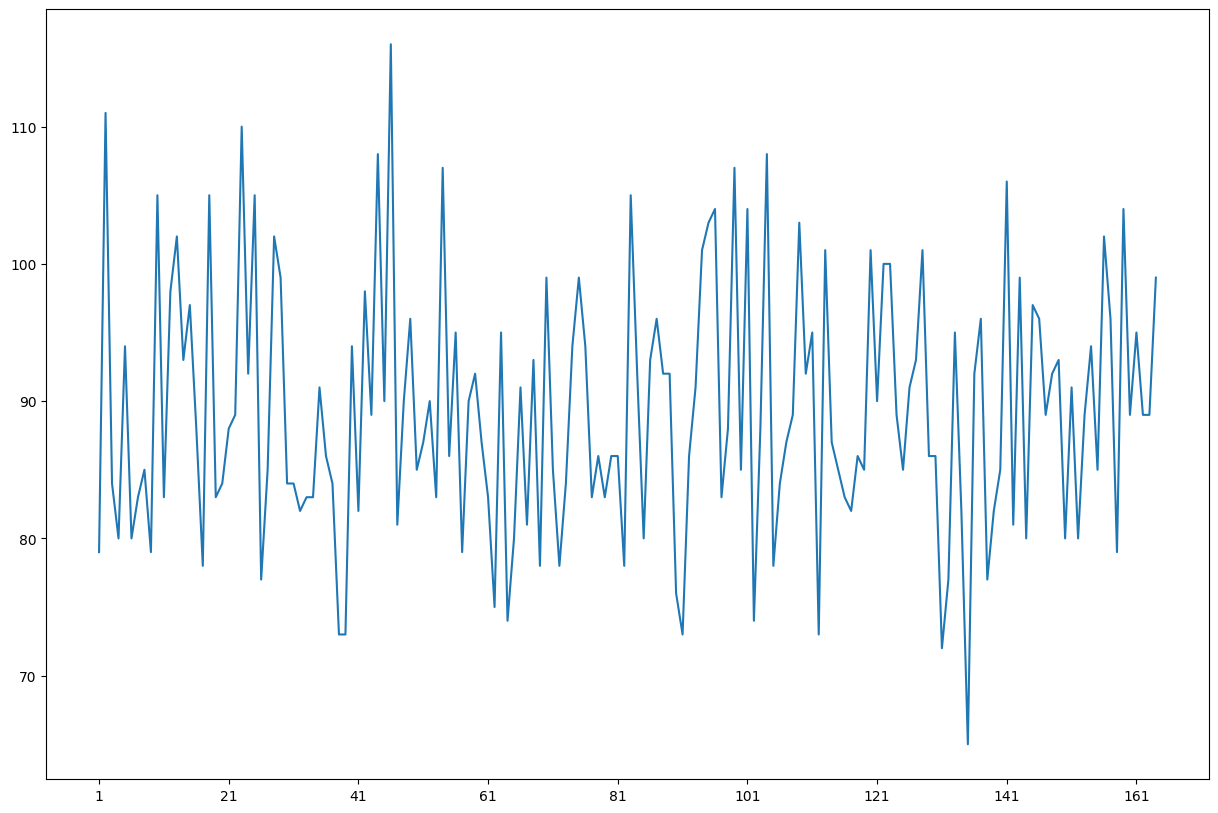

In [ ]:
df_nulls.plot(figsize=(15,10))
plt.show()

In [ ]:
df.isnull().sum().sum()

14641

**Observations:**

* Subsystems(columns) that are empty- 4, 86 aand 127.

* Subsystems(columns) that contain negative values- 9, 45 and 100. The column  45 contains only negative values which is -1.

* The df_nulls.info() tells that every subsystem has missing values and the "describe" indicates that it ranges from 65 to 116. The columns have mean number of 89.27 missing values whereas median says it's around 88.5. This can be seen from above plot where 'y=89' seems to be intersecting most of the values.

* Total number of Null values in the dataframe of shape 2975*164 is 14641.



---



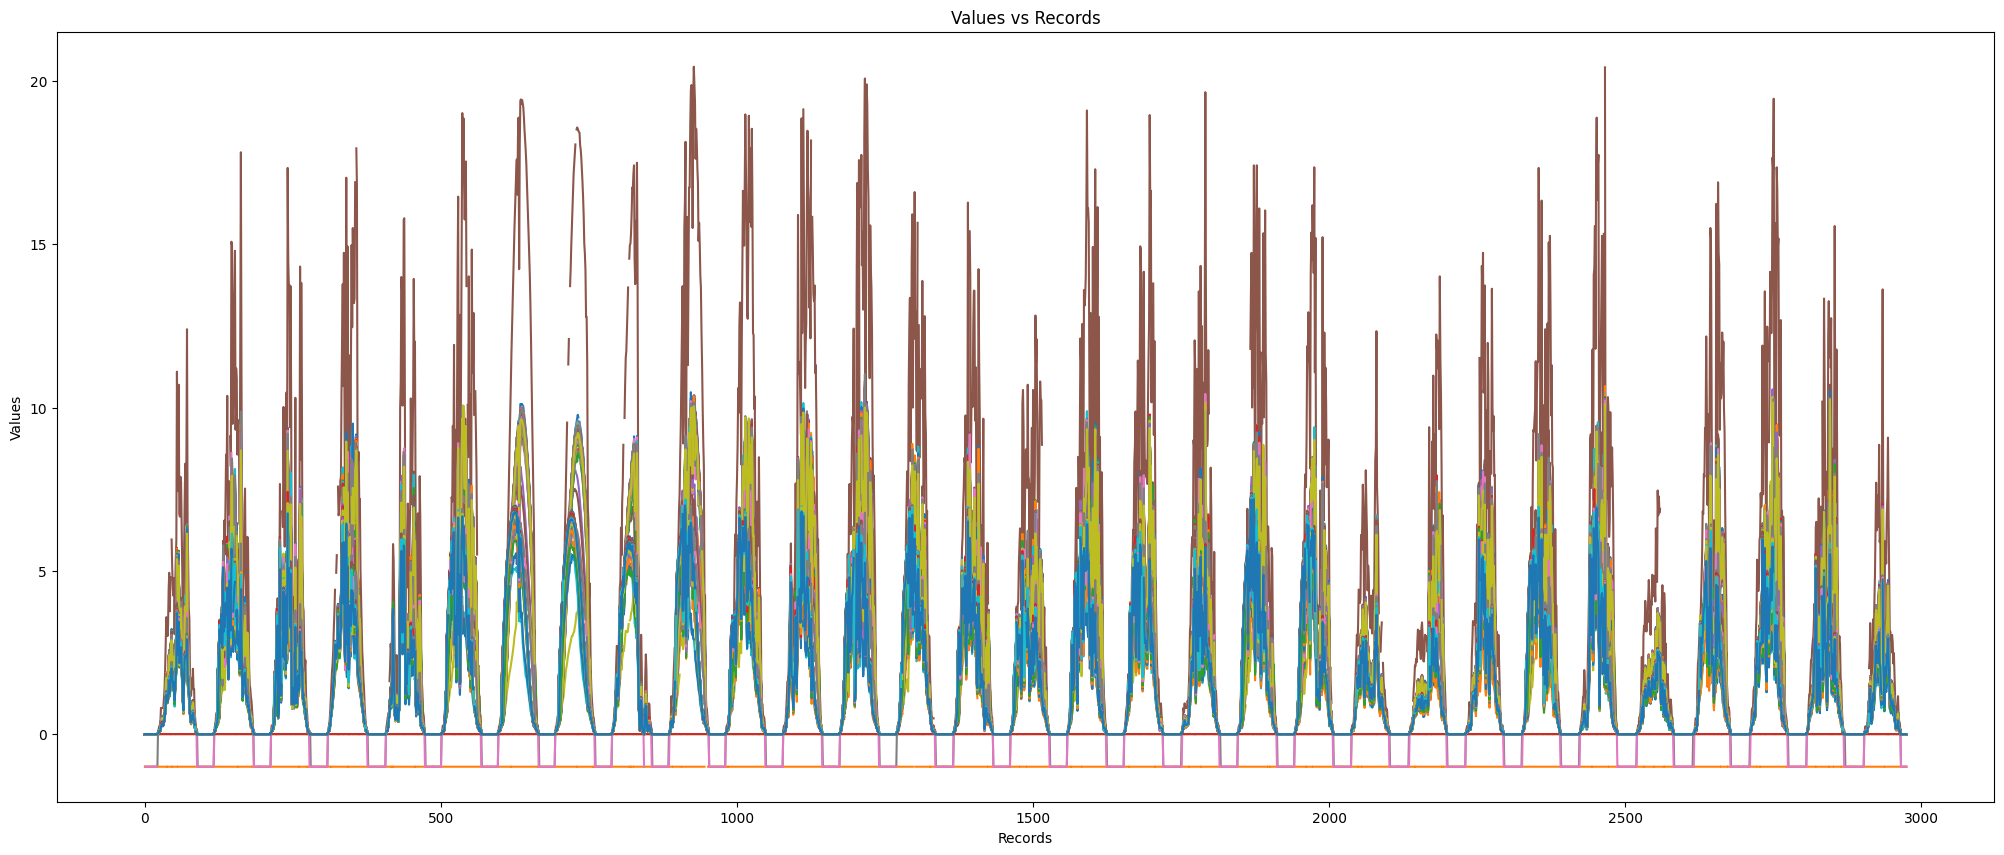

In [ ]:
# Distribution of values for each subsystems
df_original.plot(figsize=(25,10), legend=False, xlabel='Records', ylabel='Values', title='Values vs Records')
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming df is your dataframe
# df_copy = df.copy()  # working on a copy to avoid modifying original df

# # Assuming the dataframe has a single column for simplicity. Adjust as needed.
# # Calculate the difference between consecutive records to find local maxima
# df_copy['diff1'] = df_copy.iloc[:,1].diff(1)  # difference with the previous record
# df_copy['diff2'] = df_copy.iloc[:,1].diff(-1)  # difference with the next record

# # Identify local maxima positions
# local_maxima_positions = df_copy[(df_copy['diff1'] > 0) & (df_copy['diff2'] > 0)].index

# # Plotting
# ax = df.iloc[:,0].plot(figsize=(25,10), legend=False, xlabel='Records', ylabel='Values', title='Values vs Records')

# # Setting x-ticks at local maxima positions and labeling them with timestamps
# ax.set_xticks(local_maxima_positions)
# ax.set_xticklabels(local_maxima_positions, rotation=45)  # rotating for better readability

# plt.tight_layout()
# plt.show()


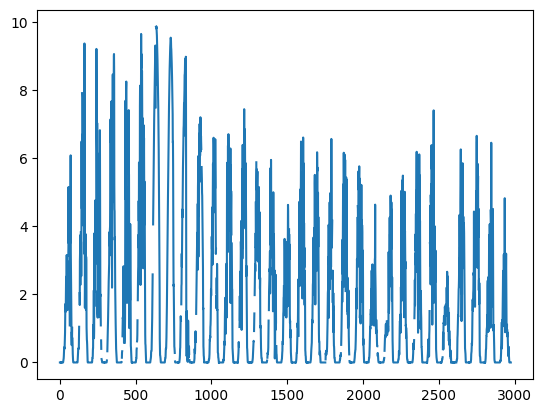

In [ ]:
df["2"].plot()
plt.show()

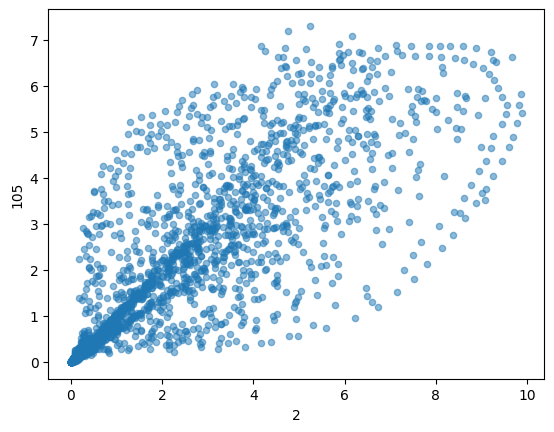

In [ ]:
df.plot.scatter(x="2", y="105", alpha=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

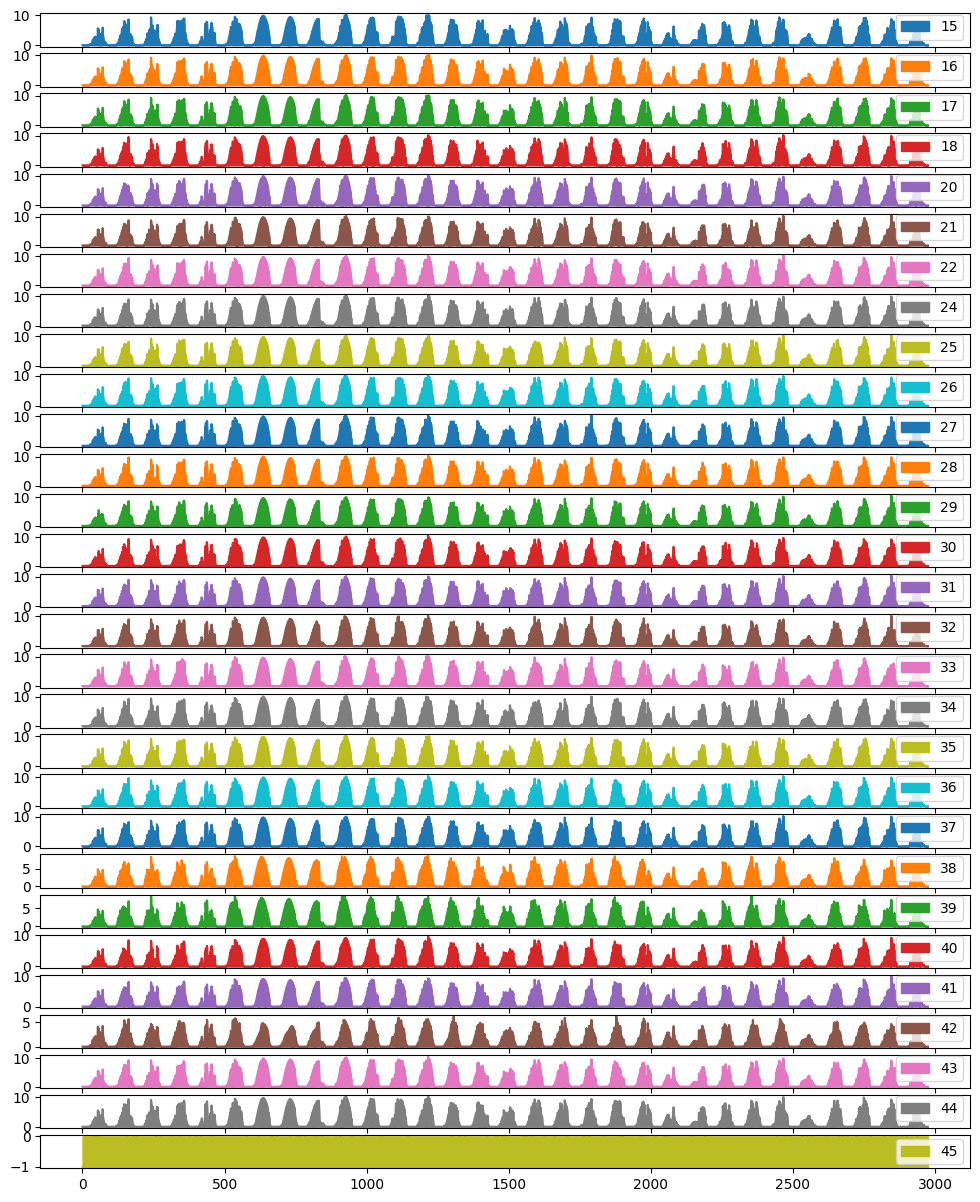

In [ ]:
axs = df.loc[:, "15":"45" ].plot.area(figsize=(12,15), subplots=True)
plt.show

##Handling NaNs, Zeros and -ve values

* Drop those columns with nans, -ve and zero values
* For the columns with mixed values of +ve and -ve, replace the -ve values with zeros since these are not correct values; Replacing with outliers also make sense as it would be counted in anomaly list but it will move the median in the box plot. So if this not a problem, we can replace it with the last value of IQR range for that particular column

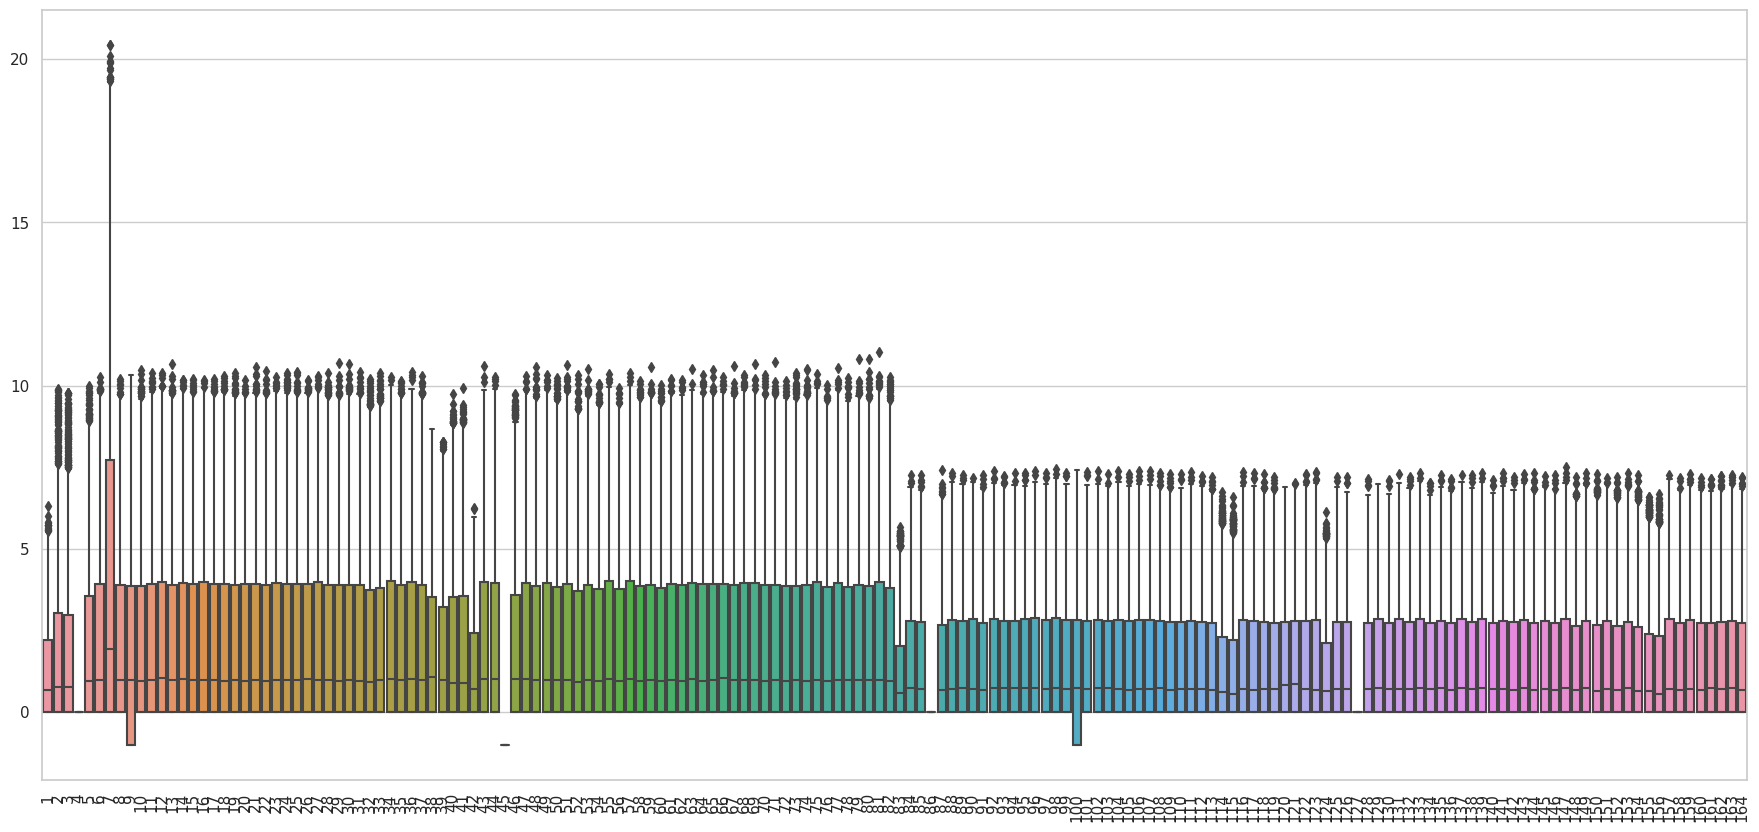

In [ ]:
df_copy = df.copy()
# for col in df.iloc[:,1:].columns:
#   if df_copy[col].dtype == 'object':
#         df_copy[col] = df_copy[col].str.replace(',', '.').astype(float)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(22,10))

# Draw a boxplot for each column
sns.boxplot(data=df_copy.drop(columns=["Datum"]))

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head()

,Datum,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-07 00:15:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_copy.drop(columns="Datum", inplace=True)

In [ ]:
df_copy.replace('NaN', np.nan, inplace=True)

In [ ]:
# Drop the date column for our calculations
df_without_date = df_copy.copy()

# 1. Columns that contain only NaNs or zeros
only_nans_or_zeros = df_without_date.columns[(df_without_date.isna() | (df_without_date == 0)).all(axis=0)]

# 2. Columns that contain only negative values
only_negative = df_without_date.columns[(df_without_date.isna() | (df_without_date < 0)).all(axis=0)]

# 3. Columns that contain both positive and negative values
mixed_values = df_without_date.columns[df_without_date.apply(lambda col: (col < 0).any() and (col > 0).any())]

print(f"Columns with only NaNs or zeros: {only_nans_or_zeros.tolist()}")
print(f"Columns with only negative values: {only_negative.tolist()}")
print(f"Columns with mixed positive and negative values: {mixed_values.tolist()}")


Columns with only NaNs or zeros: ['4', '86', '127']
Columns with only negative values: ['45']
Columns with mixed positive and negative values: ['9', '100']


In [ ]:
only_nans_or_zeros = only_nans_or_zeros.tolist()
only_negative = only_negative.tolist()

In [ ]:
# for i in (only_nans_or_zeros,only_negative):
df_without_date.drop(columns=only_nans_or_zeros + only_negative, inplace=True)

In [ ]:
# Check if all not required columns are handled
if only_nans_or_zeros + only_negative in list(df_without_date.columns):
  print(True)

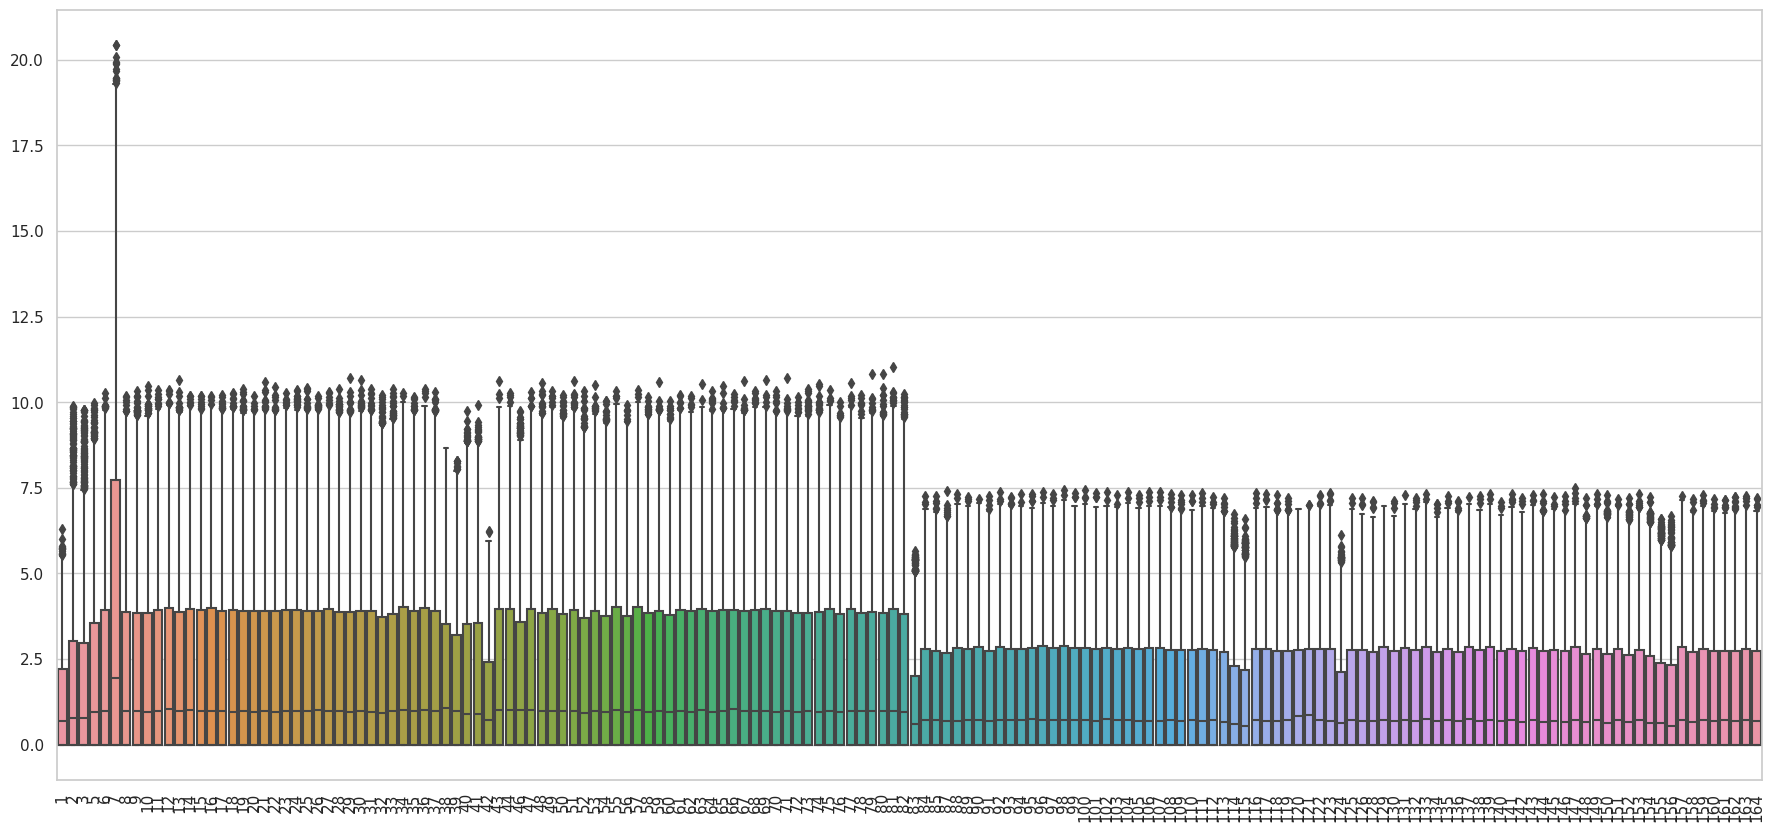

In [ ]:
# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(22,10))

# Draw a boxplot for each column
# sns.boxplot(data=df_copy.drop(columns=["Datum"]))
sns.boxplot(data=df_without_date)

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
df_datum = df[['Datum']]
df_copy = pd.concat([df_datum, df_without_date], axis=1)

In [ ]:
df_copy["Datum"] = pd.to_datetime(df_copy["Datum"])

In [ ]:
df_copy.head()

,Datum,1,2,3,5,6,7,8,9,10,...,155,156,157,158,159,160,161,162,163,164
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-07 00:15:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,2023-01-07 00:45:00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Columns: 161 entries, Datum to 164
dtypes: datetime64[ns](1), float64(160)
memory usage: 3.7 MB
